<a href="https://colab.research.google.com/github/Nitin221206/project/blob/main/Global_terrorism_data_capston_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

Amidst the rising global threat of terrorism, this data analysis project seeks to examine and analyze the Global Terrorism Database (GTD) to identify patterns and trends in terrorist incidents worldwide. The primary objective is to understand the geographical distribution, frequency, and severity of terrorist attacks, with a focus on factors such as attack types, target locations, and perpetrating groups. By employing data wrangling concept, and data visualization, the project aims to provide actionable insights for policymakers and security agencies. The expected deliverables include a detailed report, visualizations, and recommendations for enhancing international efforts to combat terrorism.

# IMPORTING LIBRARY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
terrorism_data = pd.read_csv("/content/drive/MyDrive/Dataset/Global Terrorism Data (2).csv", encoding='ISO-8859-1')

<ipython-input-106-4d76608972cc>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  terrorism_data = pd.read_csv("/content/drive/MyDrive/Dataset/Global Terrorism Data (2).csv", encoding='ISO-8859-1')


# **TAKING INFO OF DATA**

In [ ]:
terrorism_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
terrorism_data.shape

(181691, 135)

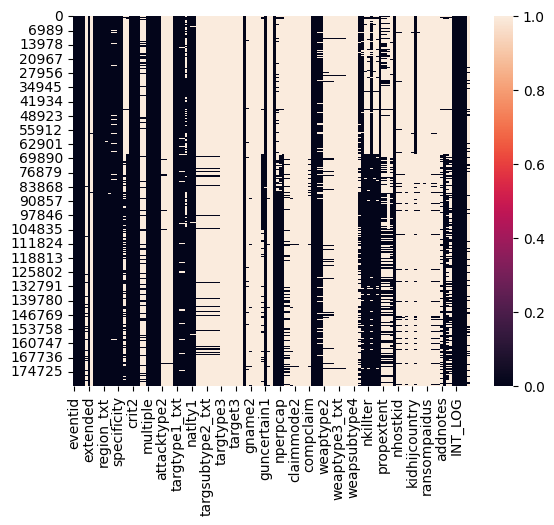

In [ ]:
#  the graph is showing nan value in data
sns.heatmap(terrorism_data.isnull())
plt.show()

In [ ]:
# total percentage of data is nan value
(terrorism_data.isnull().sum()/(terrorism_data.shape[0]) * 100)

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

# CLEANING THE DATA

In [ ]:
# the columns drop are "approxdate","resolution","location","alternative","alternative_txt","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","targtype2","targtype2_txt","targsubtype2","targsubtype2_txt","corp2","target2","natlty2","natlty2_txt","targtype3","targtype3_txt","targsubtype3","targsubtype3_txt","corp3","target3","natlty3","natlty3_txt","gsubname"
terrorism_data.drop(columns = ["approxdate","resolution","location","alternative","alternative_txt","attacktype2","attacktype2_txt","attacktype3","attacktype3_txt","targtype2","targtype2_txt","targsubtype2","targsubtype2_txt","corp2","target2","natlty2","natlty2_txt","targtype3","targtype3_txt","targsubtype3","targsubtype3_txt","corp3","target3","natlty3","natlty3_txt","gsubname"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["gname2","gsubname2","gname3","gsubname3","motive","guncertain3","guncertain2","claimmode","claimmode_txt","claim2","claimmode2","claimmode2_txt","claim3","claimmode3","claimmode3_txt","compclaim","weaptype2"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["weaptype2_txt","weapsubtype2","weapsubtype2_txt","weaptype3","weaptype3_txt","weapsubtype3","weapsubtype3_txt","weaptype4","weaptype4_txt","weapsubtype4","weapsubtype4_txt"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["propextent","propextent_txt","propvalue","propcomment","nhostkid","nhostkidus","nhours","ndays"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["divert","kidhijcountry","ransom","ransomamt","ransomamtus","ransompaid","ransompaidus","ransomnote"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["hostkidoutcome","hostkidoutcome_txt","nreleased","addnotes","scite2","scite3"], inplace = True)

In [ ]:
terrorism_data.drop(columns = ["related"], inplace = True)

In [ ]:
terrorism_data.shape

(181691, 58)

In [ ]:
terrorism_data.select_dtypes(include = "object").columns

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'dbsource'],
      dtype='object')

In [ ]:
for i in terrorism_data.select_dtypes(include = "object").columns:
    terrorism_data[i].fillna(terrorism_data[i].mode()[0],inplace = True)

In [ ]:
terrorism_data.select_dtypes(include = "float64").columns

Index(['latitude', 'longitude', 'specificity', 'doubtterr', 'multiple',
       'targsubtype1', 'natlty1', 'guncertain1', 'nperps', 'nperpcap',
       'claimed', 'weapsubtype1', 'nkill', 'nkillus', 'nkillter', 'nwound',
       'nwoundus', 'nwoundte', 'ishostkid'],
      dtype='object')

In [ ]:
terrorism_data["nkill"].mean()

2.4032722986614385

In [ ]:
terrorism_data["nkill"].fillna((2.4032722),inplace=True)

In [ ]:
terrorism_data["latitude"].mean()

23.498342959285292

In [ ]:
terrorism_data["latitude"].fillna((23.498342959285292),inplace=True)

In [ ]:
terrorism_data["longitude"].mean()

-458.69565302483994

In [ ]:
terrorism_data["longitude"].fillna((-458.69565302483994),inplace=True)

In [ ]:
terrorism_data["specificity"].mean()

1.451451688361725

In [ ]:
terrorism_data["specificity"].fillna((1.451451688361725),inplace=True)

In [ ]:
terrorism_data["doubtterr"].mean()

-0.5231713357917331

In [ ]:
terrorism_data["doubtterr"].fillna((-0.5231713357917331),inplace=True)

In [ ]:
terrorism_data["multiple"].mean()

0.13777313005668998

In [ ]:
terrorism_data["multiple"].fillna((0.13777313005668998),inplace=True)

In [ ]:
terrorism_data["targsubtype1"].mean()

46.971474100795014

In [ ]:
terrorism_data["targsubtype1"].fillna((46.971474100795014),inplace=True)

In [ ]:
terrorism_data["natlty1"].mean()

127.68644105433793

In [ ]:
terrorism_data["natlty1"].fillna((127.68644105433793),inplace=True)

In [ ]:
terrorism_data["guncertain1"].mean()

0.08144017737478697

In [ ]:
terrorism_data["guncertain1"].fillna((0.08144017737478697),inplace=True)

In [ ]:
terrorism_data["nperps"].mean()

-65.36115431920128

In [ ]:
terrorism_data["nperps"].fillna((-65.36115431920128),inplace=True)

In [ ]:
terrorism_data["nperpcap"].mean()

-1.517726956738739

In [ ]:
terrorism_data["nperpcap"].fillna((-1.517726956738739),inplace=True)

In [ ]:
terrorism_data["claimed"].mean()

0.04966643881250487

In [ ]:
terrorism_data["claimed"].fillna((0.04966643881250487),inplace=True)

In [ ]:
terrorism_data["weapsubtype1"].mean()

11.117161623882229

In [ ]:
terrorism_data["weapsubtype1"].fillna((11.117161623882229),inplace=True)

In [ ]:
terrorism_data["nperpcap"].mean()

-1.5177269567387393

In [ ]:
terrorism_data["nperpcap"].fillna((-1.517726956738739),inplace=True)

In [ ]:
terrorism_data["nkillus"].mean()

0.0459806388332125

In [ ]:
terrorism_data["nkillus"].fillna((0.0459806388332125),inplace=True)

In [ ]:
terrorism_data["nkillter"].mean()

0.508057838634046

In [ ]:
terrorism_data["nkillter"].fillna((0.508057838634046),inplace=True)

In [ ]:
terrorism_data["nwound"].mean()

3.1676684000483735

In [ ]:
terrorism_data["nwound"].fillna((3.1676684000483735),inplace=True)

In [ ]:
terrorism_data["nwoundus"].mean()

0.03894383232611613

In [ ]:
terrorism_data["nwoundus"].fillna((0.03894383232611613),inplace=True)

In [ ]:
terrorism_data["nwoundte"].mean()

0.10716316593808864

In [ ]:
terrorism_data["nwoundte"].fillna((0.10716316593808864),inplace=True)

In [ ]:
terrorism_data["ishostkid"].mean()

0.05905362150369395

In [ ]:
terrorism_data["ishostkid"].fillna((0.05905362150369395),inplace=True)

In [ ]:
terrorism_data.shape

(181691, 58)

In [ ]:
(terrorism_data.isnull().sum()/(terrorism_data.shape[0])*100).head(58)

eventid             0.0
iyear               0.0
imonth              0.0
iday                0.0
extended            0.0
country             0.0
country_txt         0.0
region              0.0
region_txt          0.0
provstate           0.0
city                0.0
latitude            0.0
longitude           0.0
specificity         0.0
vicinity            0.0
summary             0.0
crit1               0.0
crit2               0.0
crit3               0.0
doubtterr           0.0
multiple            0.0
success             0.0
suicide             0.0
attacktype1         0.0
attacktype1_txt     0.0
targtype1           0.0
targtype1_txt       0.0
targsubtype1        0.0
targsubtype1_txt    0.0
corp1               0.0
target1             0.0
natlty1             0.0
natlty1_txt         0.0
gname               0.0
guncertain1         0.0
individual          0.0
nperps              0.0
nperpcap            0.0
claimed             0.0
weaptype1           0.0
weaptype1_txt       0.0
weapsubtype1    

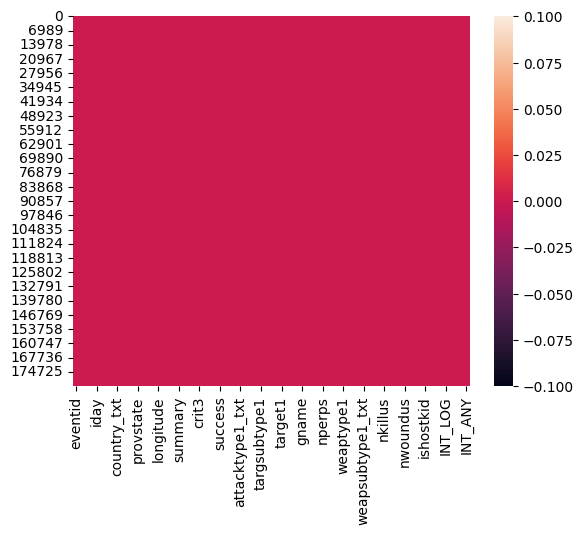

In [ ]:
sns.heatmap(terrorism_data.isnull())
plt.show()

In [ ]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   iyear             181691 non-null  int64  
 2   imonth            181691 non-null  int64  
 3   iday              181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   country_txt       181691 non-null  object 
 7   region            181691 non-null  int64  
 8   region_txt        181691 non-null  object 
 9   provstate         181691 non-null  object 
 10  city              181691 non-null  object 
 11  latitude          181691 non-null  float64
 12  longitude         181691 non-null  float64
 13  specificity       181691 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  summary           181691 non-null  object 
 16  crit1             18

In [ ]:
csv_filename = 'gtd_clean_data.csv'
terrorism_data.to_csv(csv_filename, index=False)

In [ ]:
print(f"Clean data has been saved to {csv_filename}.")

Clean data has been saved to gtd_clean_data.csv.


In [ ]:
csv_filename = pd.read_csv("gtd_clean_data.csv", encoding='ISO-8859-1')

In [ ]:
gtd = csv_filename

In [ ]:
gtd.shape

(181691, 58)

In [ ]:
gtd.drop_duplicates()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundus,nwoundte,property,ishostkid,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Baghdad,...,0.038944,0.107163,0,0.0,Committee on Government Operations United Stat...,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0.038944,0.107163,0,1.0,Committee on Government Operations United Stat...,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.038944,0.107163,0,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,0.038944,0.107163,1,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,0.038944,0.107163,1,0.0,Committee on Government Operations United Stat...,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,0.000000,0.000000,-9,0.0,"""Somalia: Al-Shabaab Militants Attack Army Che...",START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,0.000000,0.000000,1,0.0,"""Putin's 'victory' in Syria has turned into a ...",START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,0.000000,0.000000,1,0.0,"""Maguindanao clashes trap tribe members,"" Phil...",START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,0.000000,0.000000,-9,0.0,"""Trader escapes grenade attack in Imphal,"" Bus...",START Primary Collection,-9,-9,0,-9


# **TAKING INSIGHTS FROM THE DATA**

**SOLVING QUESTIONS USING GRAPH**

In [ ]:
# 1- What is the overall trend in the number of terrorist incidents worldwide during the specified period?

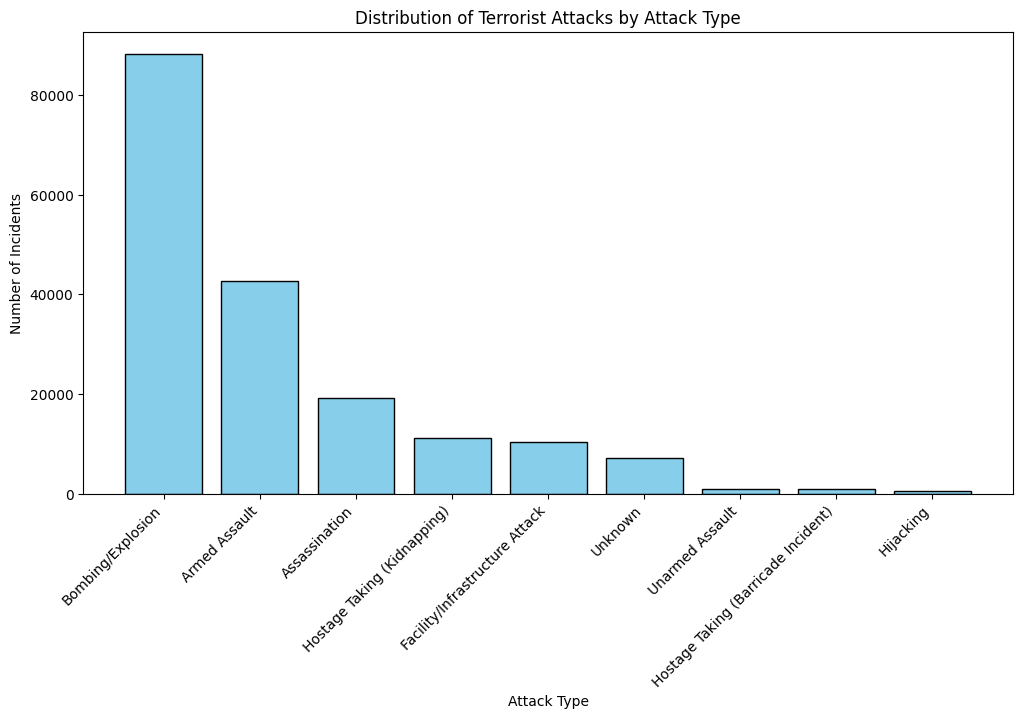

In [ ]:
# Get the counts of terrorist attacks by attack type
attack_type_counts = gtd['attacktype1_txt'].value_counts()

# Plot a bar chart for the distribution of terrorist attacks by attack type
plt.figure(figsize=(12, 6))
plt.bar(attack_type_counts.index, attack_type_counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Terrorist Attacks by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 2- Which regions experienced the highest and lowest rates of terrorism between 1970 and 2017?

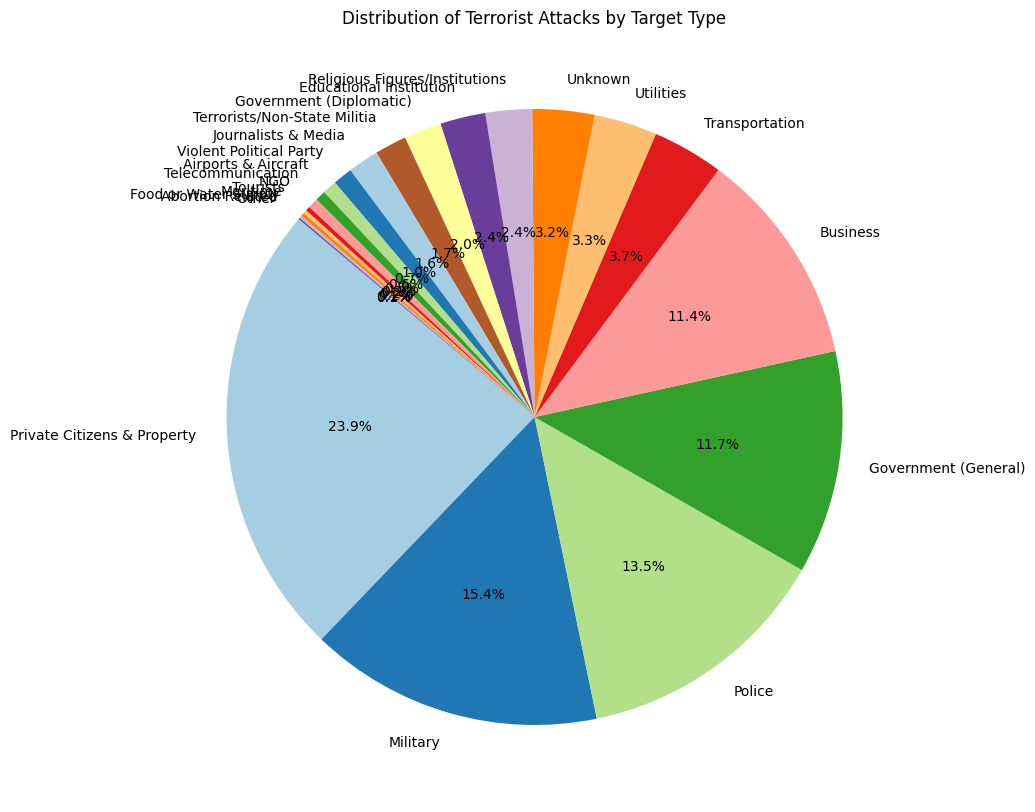

In [ ]:
# Get the counts of terrorist attacks by target type
target_type_counts = gtd['targtype1_txt'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 10))
plt.pie(target_type_counts, labels=target_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Terrorist Attacks by Target Type')
plt.show()



In [ ]:
# 3- Can you identify any significant spikes or declines in terrorist activity during specific years or decades?

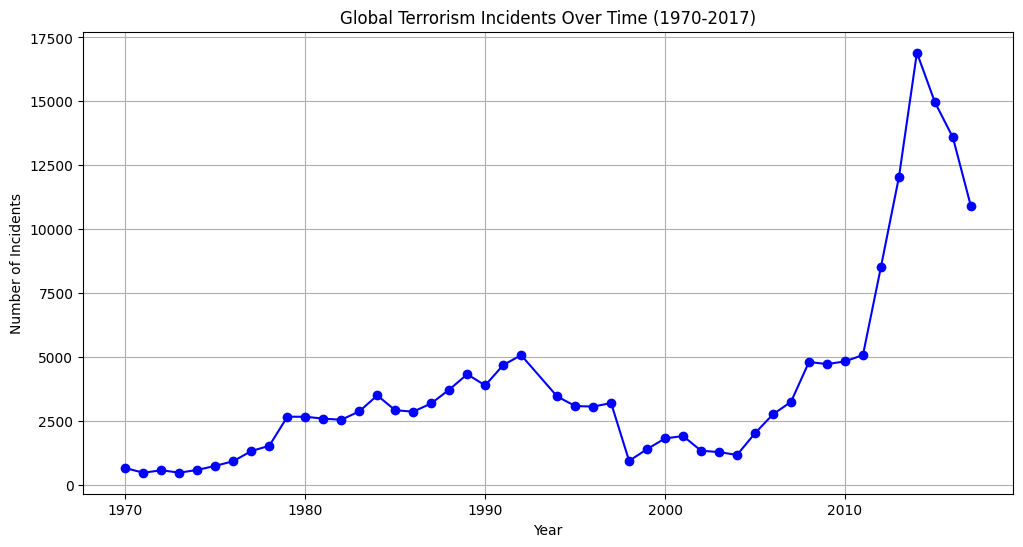

In [ ]:
# Group the data by year and calculate the number of incidents in each year
incidents_per_year = gtd.groupby('iyear').size()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year, marker='o', linestyle='-', color='b')
plt.title('Global Terrorism Incidents Over Time (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [ ]:
# 4- What were the most common tactics used by terrorists during this time frame?

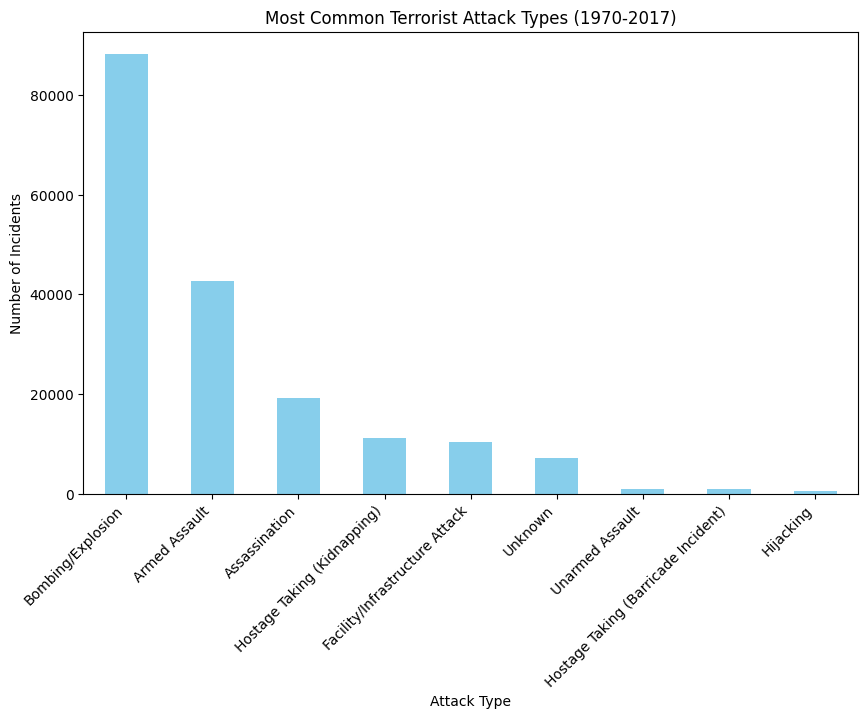

In [ ]:
# Group the data by attack type and calculate the number of incidents for each type
attack_type_counts = gtd['attacktype1_txt'].value_counts()

# Plot the most common attack types
plt.figure(figsize=(10, 6))
attack_type_counts.plot(kind='bar', color='skyblue')
plt.title('Most Common Terrorist Attack Types (1970-2017)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 5- Were there any notable shifts in the types of targets chosen by terrorists over the years?

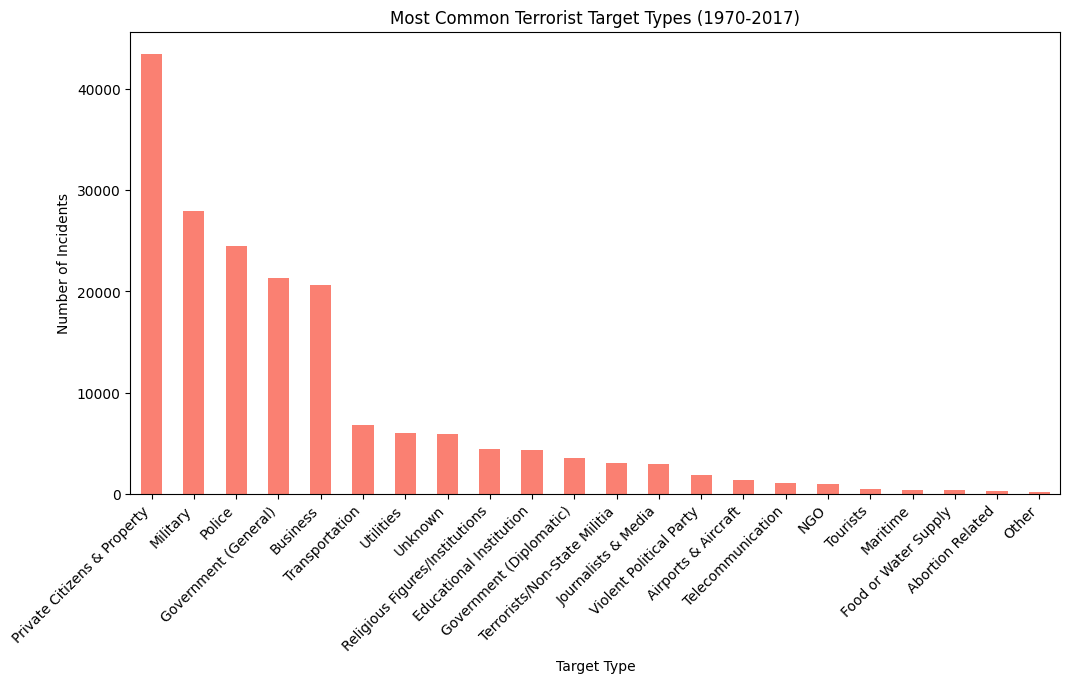

In [ ]:
# Group the data by target type and calculate the number of incidents for each type
target_type_counts = gtd['targtype1_txt'].value_counts()

# Plot the most common target types
plt.figure(figsize=(12, 6))
target_type_counts.plot(kind='bar', color='salmon')
plt.title('Most Common Terrorist Target Types (1970-2017)')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 6- Which terrorist groups were the most active globally during the specified period?

<ipython-input-183-178029c713f3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=terrorist_group_counts.values, y=terrorist_group_counts.index, palette='viridis')


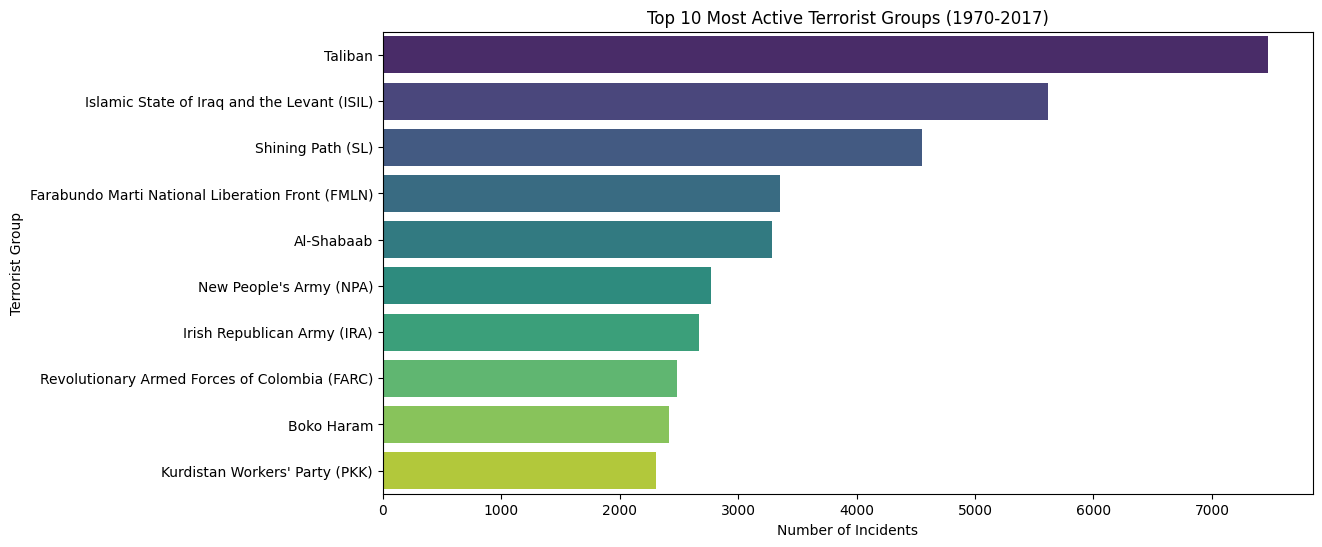

In [ ]:
# Filter out incidents with unknown perpetrators
terrorism_data_filtered = gtd[terrorism_data['gname'] != 'Unknown']

# Group the data by terrorist group and calculate the number of incidents for each group
terrorist_group_counts = terrorism_data_filtered['gname'].value_counts().head(10)

# Plot the most active terrorist groups using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=terrorist_group_counts.values, y=terrorist_group_counts.index, palette='viridis')
plt.title('Top 10 Most Active Terrorist Groups (1970-2017)')
plt.xlabel('Number of Incidents')
plt.ylabel('Terrorist Group')
plt.show()

In [ ]:
# 7- How has the lethality of terrorist incidents evolved over time?

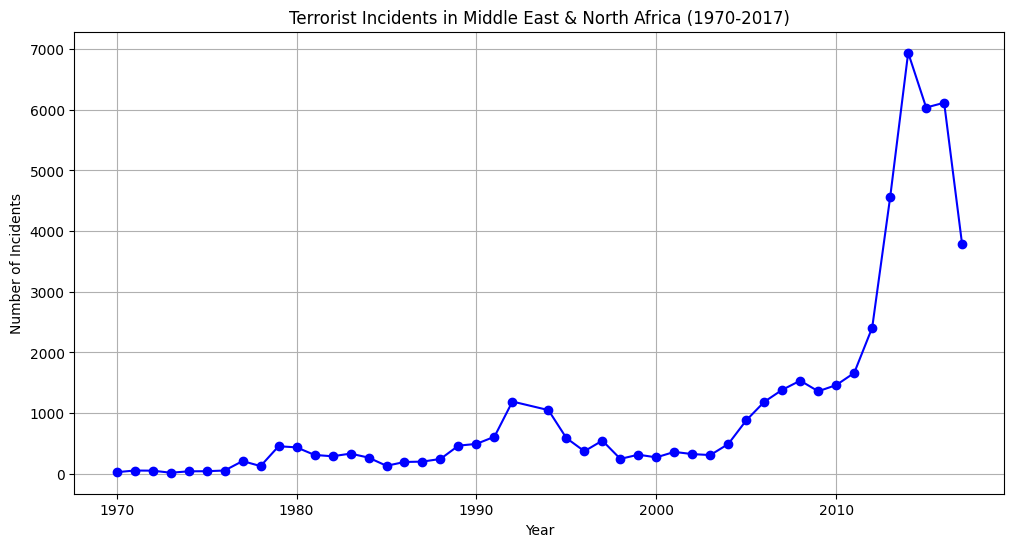

In [ ]:
# Choose a specific region (replace 'Middle East & North Africa' with your desired region)
selected_region = 'Middle East & North Africa'
region_data = gtd[gtd['region_txt'] == selected_region]

# Group the data by year and calculate the number of incidents in each year
incidents_per_year = region_data.groupby('iyear').size()

# Plot the trend over the years
plt.figure(figsize=(12, 6))
plt.plot(incidents_per_year, marker='o', linestyle='-', color='b')
plt.title(f'Terrorist Incidents in {selected_region} (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

In [ ]:
# 8- Were there any patterns in the choice of weapons or methods used by terrorists over the years?

<Figure size 1500x800 with 0 Axes>

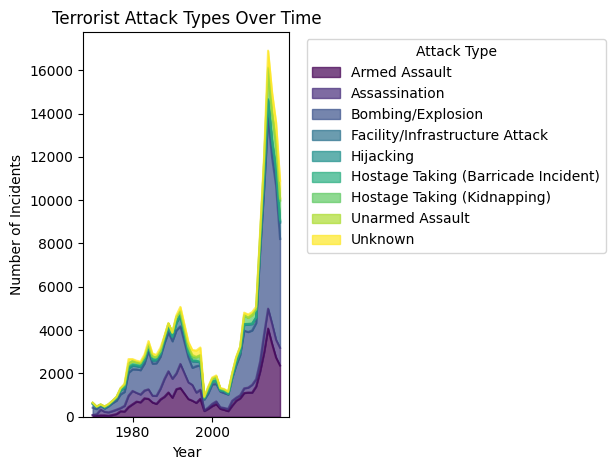

In [ ]:
# Group the data by year and attack type, calculate the number of incidents for each type
attack_type_counts = gtd.groupby(['iyear', 'attacktype1_txt']).size().unstack().fillna(0)

# Plot the trend in terrorist attack types over the years
plt.figure(figsize=(15, 8))
attack_type_counts.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)
plt.title('Terrorist Attack Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#9- Can you identify any trends in the motives behind terrorist attacks during this period?

<Figure size 1500x800 with 0 Axes>

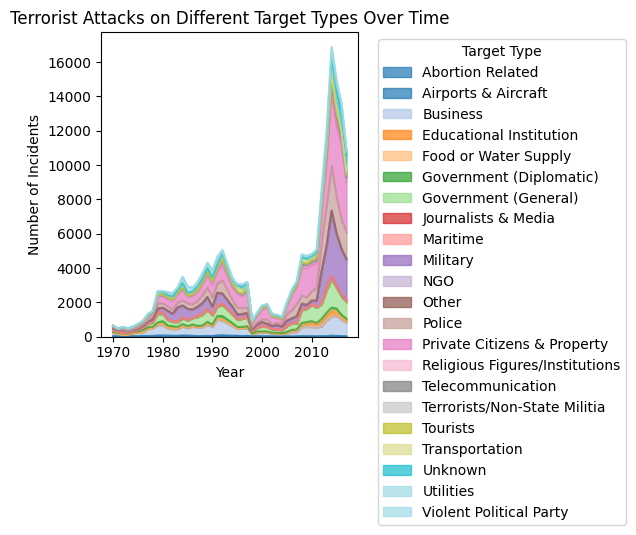

In [ ]:
# Group the data by year and target type, calculate the number of incidents for each type
target_type_counts = gtd.groupby(['iyear', 'targtype1_txt']).size().unstack().fillna(0)

# Plot the trend in terrorist attacks on different target types over the years
plt.figure(figsize=(15, 8))
target_type_counts.plot(kind='area', stacked=True, colormap='tab20', alpha=0.7)
plt.title('Terrorist Attacks on Different Target Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Target Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#10- Were there any changes in the demographics of individuals involved in terrorism, such as age, gender, or nationality?

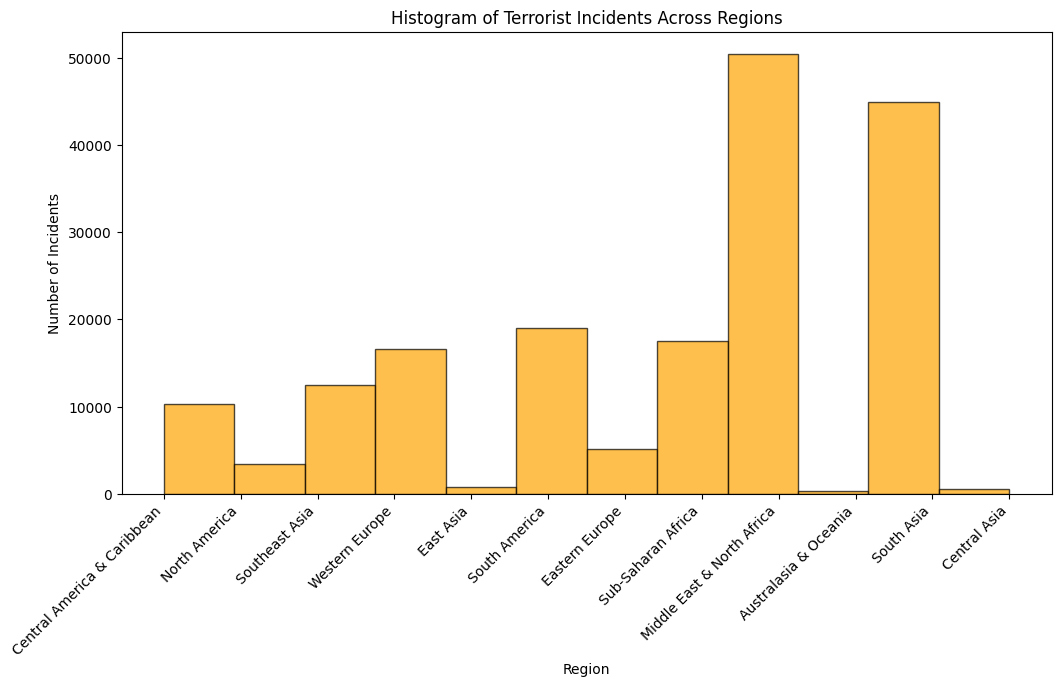

In [ ]:
# Get the counts of terrorist incidents per region
region_counts = gtd['region_txt'].value_counts()

# Plot a histogram of the distribution of incidents across regions
plt.figure(figsize=(12, 6))
plt.hist(terrorism_data['region_txt'], bins=len(region_counts), color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of Terrorist Incidents Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 11- country having a highest attack

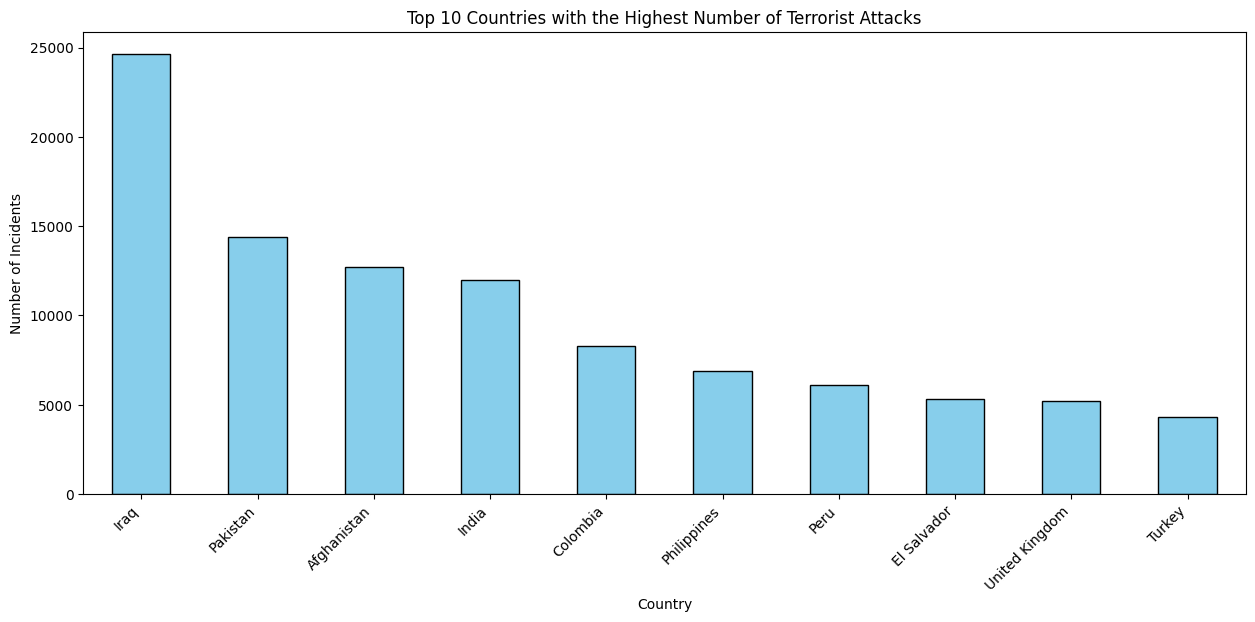

In [ ]:
# Get the top 10 countries with the highest number of terrorist attacks
top_countries = gtd['country_txt'].value_counts().head(10)

# Plot a bar chart for the top 10 countries with the highest number of terrorist attacks
plt.figure(figsize=(15, 6))
top_countries.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with the Highest Number of Terrorist Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 12- top 10 citys which had a highest attack

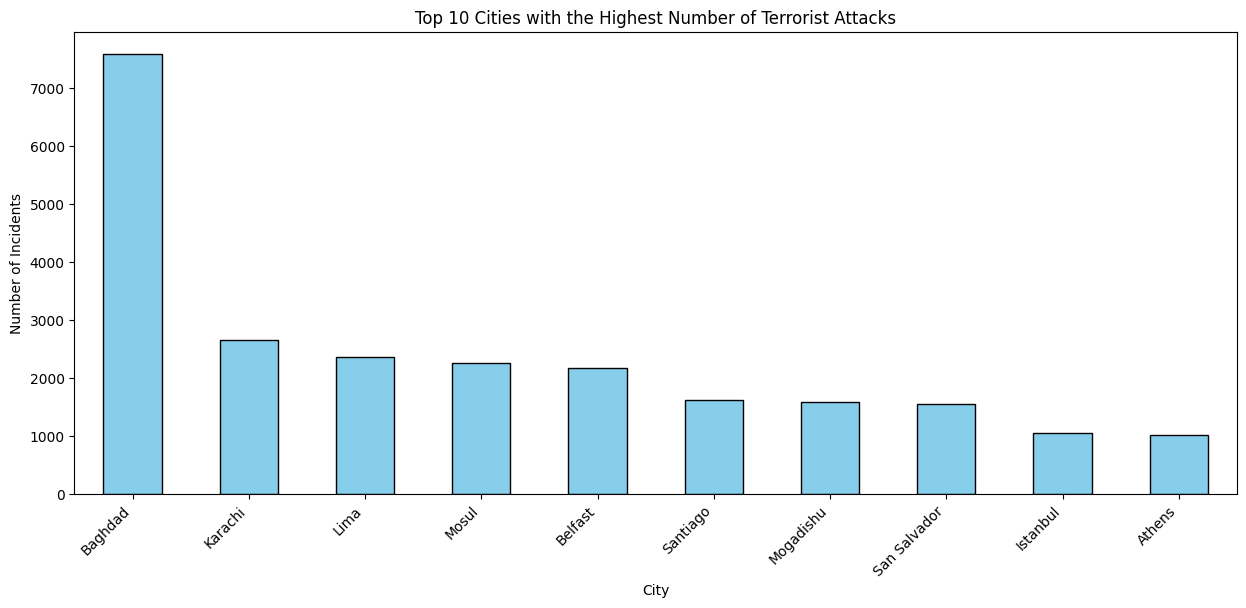

In [ ]:
# Get the top 10 cities with the highest number of terrorist attacks
city = gtd["city"].value_counts()[1:11]

# Plot a bar chart for the top 10 cities with the highest number of terrorist attacks
plt.figure(figsize=(15, 6))
city.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Cities with the Highest Number of Terrorist Attacks')
plt.xlabel('City')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# 13 - terrorist attack over the year in Iraq

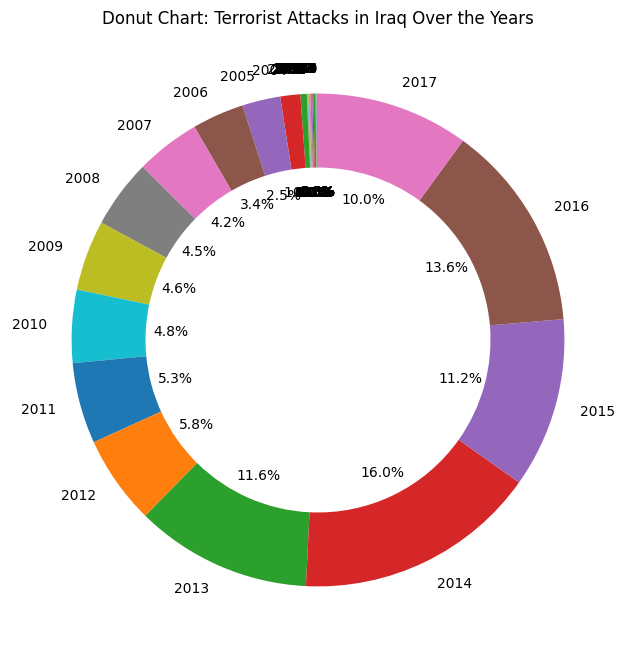

In [ ]:
top_country = gtd['country_txt'].value_counts().idxmax()

# Filter the data for the top country
top_country_data = terrorism_data[terrorism_data['country_txt'] == top_country]

# Create a DataFrame with the count of incidents for each year in the top country
incident_counts = top_country_data.groupby('iyear').size().reset_index(name='Number of Incidents')

# Create a donut chart for the top country with the highest number of terrorist attacks
plt.figure(figsize=(8, 8))
plt.pie(incident_counts['Number of Incidents'], labels=incident_counts['iyear'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0,0),0.2,fc='white'))
plt.title(f'Donut Chart: Terrorist Attacks in {top_country} Over the Years')
plt.show()

# CONCLUSION

The Exploratory Data Analysis (EDA) of global terrorism data has revealed several key insights into the patterns and trends of terrorist activities worldwide. Our analysis indicated significant geographic and temporal variations in terrorist incidents, with certain regions, such as the Middle East & North africa and South Asia, experiencing higher frequencies of attacks. Temporal trends highlighted spikes in terrorist activities during specific periods, often linked to political unrest or conflicts. We also identified that certain groups were responsible for a majority of attacks. This comprehensive analysis underscores the importance of targeted counter-terrorism strategies and the need for continuous monitoring to mitigate future threats effectively.






